# Model testing
In this notebook, the x vlaues from the test data are fed into the model.  The residuals between the training data and the test data are visualized at the end of the notebook to inlcude R2 adjusted values for both sets of data passed through the model.

### Import required packages

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from scipy.stats import stats
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import onetime_ols function for access to model

In [2]:
def onetime_ols(X_train, y_train):
    # Create x constants
    Xconst = sm.add_constant(X_train)

    # Create OLS model and summary
    ols_model = sm.OLS(y_train, Xconst, hasconst= True)
    est = ols_model.fit()
    results = est.summary()
    
    return est, results

### Retrieve data

In [3]:
X_train = pd.read_csv('../data/X_train2.csv', index_col=0)
X_test = pd.read_csv('../data/X_test.csv', index_col=0)

pickle_in = open('../data/y_train.pickle', 'rb')
y_train = pickle.load(pickle_in)

pickle_in = open('../data/y_test.pickle', 'rb')
y_test = pickle.load(pickle_in)

pickle_in = open('../data/kill_cols.pickle', 'rb')
kill_cols = pickle.load(pickle_in)

### Calculate log of dependant variables

In [4]:
y_test_log = np.log(y_test)
y_train_log = np.log(y_train)

### Drop deselected features from the X_test

In [5]:
X_test = X_test.drop(columns=kill_cols)

### Recreate model from training data

In [6]:
model, train_results = onetime_ols(X_train, y_train_log)

In [7]:
# summary = (train_est.summary2().tables[1])

### Prepare test data set for model to generate test predicitons

In [8]:
Xconst_test = sm.add_constant(X_test)
y_pred_test = model.predict(Xconst_test)

### Visualize the results

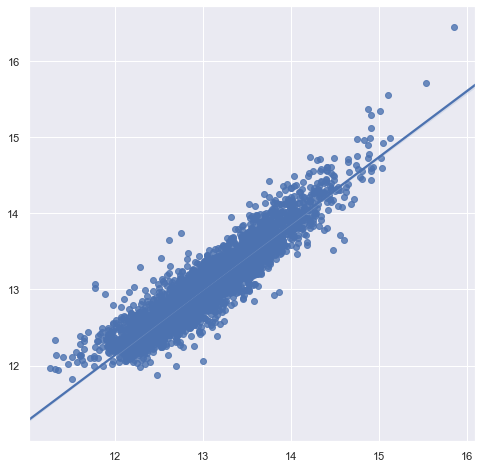

In [9]:
# Plot predicted values
sns.set(style="darkgrid")   
fig, ax = plt.subplots(figsize=(8, 8))

tr = sns.regplot(x=y_test_log, y=y_pred_test);

In [10]:
# sns.set(style="darkgrid")   
# fig, ax = plt.subplots(figsize=(15, 8))  

# tr = sns.regplot(x=y_train, y=y_pred);
# te = sns.dist(x=y_test, y=y_test_pred);

# xlabels = ['${:,.0f}'.format(x) + 'M' for x in tr.get_xticks()/1000000]
# ylabels = ['${:,.0f}'.format(y) + 'M' for y in tr.get_xticks()/1000000]

# ax.set_title('Train and Test Predictions')
# ax.set_ylabel('Train and Test Values')
# ax.set_ylabel('Prediction Values')

# tr.set_xticklabels(xlabels);
# tr.set_yticklabels(ylabels);

### Review residuals

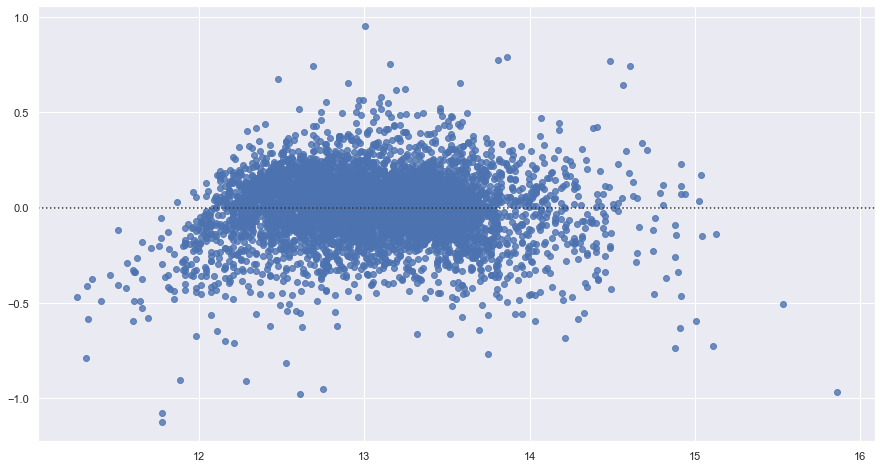

In [11]:
# Define x and y axis
xax = y_test_log
yax = y_test_log - y_pred_test

# Create sns graph
sns.set(style="darkgrid")   
fig, ax = plt.subplots(figsize=(15, 8))

resid = sns.residplot(x=xax, y=yax);

### Review difference in r2 adjusted between the training model the test model

In [12]:
model.rsquared_adj

0.8777761060907783

In [13]:
print('The test model has an r2 adjusted of {}.  Compared to the original model\'s of {}'\
      .format(model.rsquared_adj, 0.8777970211775705, model.rsquared_adj - 0.8777970211775705))

The test model has an r2 adjusted of 0.8777761060907783.  Compared to the original model's of 0.8777970211775705
